# **Delhivery - Feature Engineering**

**Introduction:**

Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating the commerce operating system.

They achieve this by utilizing world-class infrastructure, ensuring the highest quality in logistics operations, and harnessing cutting-edge engineering and technology capabilities.



**About this case study?**

From **Delhivery’s** Perspective:
- Delhivery aims to establish itself as the premier player in the logistics industry. This case study is of paramount importance as it aligns with the company's core objectives
and operational excellence.
- It provides a practical framework for understanding and processing data, which is integral to their operations. By leveraging data engineering pipelines and data analysis
techniques, Delhivery can achieve several critical goals.
- First, it allows them to ensure data integrity and quality by addressing missing values and structuring the dataset appropriately.
- Second, it enables the extraction of valuable features from raw data, which can be utilized for building accurate forecasting models.
- Moreover, it facilitates the identification of patterns, insights, and actionable recommendations crucial for optimizing their logistics operations.
- By conducting hypothesis testing and outlier detection, Delhivery can refine their processes and further enhance the quality of service they provide.


**Column Profiling:**
  1. data - tells whether the data is testing or training data
  2. trip_creation_time – Timestamp of trip creation
  3. route_schedule_uuid – Unique ID for a particular route schedule
  4. route_type – Transportation type
    - FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    - Carting: Handling system consisting of small vehicles (carts)
  5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
  6. source_center - Source ID of trip origin
  7. source_name - Source Name of trip origin
  8. destination_cente – Destination ID
  9. destination_name – Destination Name
  10. od_start_time – Trip start time
  11. od_end_time – Trip end time
  12. start_scan_to_end_scan – Time taken to deliver from source to destination
  13. is_cutoff – Unknown field
  14. cutoff_factor – Unknown field
  15. cutoff_timestamp – Unknown field
  16. actual_distance_to_destination – Distance in kms between source and destination
  warehouse
  17. actual_time – Actual time taken to complete the delivery (Cumulative)
  18. osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
  19. osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
  20. factor – Unknown field
  21. segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
  22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
  23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
  24. segment_factor – Unknown field


**Buisness Problem:**

The company wants to understand and process the data coming out of data engineering pipelines:
- Clean, sanitize and manipulate data to get useful features out of raw fields
- Make sense out of the raw data and help the data science team to build forecasting models on it.

# **What does ‘good’ look like?**


##**1. Basic data cleaning and exploration:**
  - Handle missing values in the data.
  - Converting time columns into pandas datetime.
  - Analyze structure & characteristics of the dataset.

In [ ]:
!gdown 1buswXCaJXijSh9rCok5H7y0PLqkntcta

Downloading...
From: https://drive.google.com/uc?id=1buswXCaJXijSh9rCok5H7y0PLqkntcta
To: /content/delhivery_data.txt
100% 55.6M/55.6M [00:01<00:00, 51.6MB/s]


In [ ]:
# importing the required modules and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from scipy.stats import norm,zscore,boxcox,probplot
from scipy.stats import ttest_ind,ttest_rel,mannwhitneyu,wilcoxon
from scipy.stats import shapiro,levene,kstest,anderson
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('delhivery_data.txt')
# Making a copy of original data for further reference
data_copy = df.copy()

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


In [ ]:
df[df.duplicated()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


**Insights:**
- The Dataset doesnot contain any duplicate values

In [ ]:
df.isna().any()

data                              False
trip_creation_time                False
route_schedule_uuid               False
route_type                        False
trip_uuid                         False
source_center                     False
source_name                        True
destination_center                False
destination_name                   True
od_start_time                     False
od_end_time                       False
start_scan_to_end_scan            False
is_cutoff                         False
cutoff_factor                     False
cutoff_timestamp                  False
actual_distance_to_destination    False
actual_time                       False
osrm_time                         False
osrm_distance                     False
factor                            False
segment_actual_time               False
segment_osrm_time                 False
segment_osrm_distance             False
segment_factor                    False
dtype: bool

In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
per_mis = (df.isna().sum()*100)/df.shape[0]
per_mis

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

**Insights:**
- Only two fields have a tiny fraction of missing values, less than 0.05% of the whole dataset.

- Since we have plenty of data to work with, I am choosing to just get rid of the missing values instead of trying to guess them using methods like using the average or most common value.


In [ ]:
# Dropping unknown fields
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns = unknown_fields)

In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [ ]:
df.shape

(144316, 19)

In [ ]:
# Converting the datatypes to category for columns like data and route_type as they only have 2 values.
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

# Converting time columns to datetime format
datetime_cols = ['trip_creation_time', 'od_start_time', 'od_end_time']
for _ in datetime_cols:
 df[_] = pd.to_datetime(df[_])

In [ ]:
df['od_end_time'].max() - df['trip_creation_time'].min()

Timedelta('26 days 03:00:07.817738')

**Insights:**
- In this dataset we have approximately 26 days data.

In [ ]:
df.dtypes

data                                    category
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                              category
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
dtype: object

In [ ]:
df.nunique()

data                                   2
trip_creation_time                 14787
route_schedule_uuid                 1497
route_type                             2
trip_uuid                          14787
source_center                       1496
source_name                         1496
destination_center                  1466
destination_name                    1466
od_start_time                      26223
od_end_time                        26223
start_scan_to_end_scan              1914
actual_distance_to_destination    143965
actual_time                         3182
osrm_time                           1531
osrm_distance                     137544
segment_actual_time                  746
segment_osrm_time                    214
segment_osrm_distance             113497
dtype: int64

##**2. Try merging the rows using the hint mentioned below.**

Since delivery details of one package is divided into several rows (think of it as connecting flights to reach a particular destination).

Now think about…

- How should we treat their fields if we combine these rows?
- What aggregation would make sense if we merge?
- What would happen to the numeric fields if we merge the rows?

1. Grouping by segment

  - Create a unique identifier for different segments of a trip based on the
  combination of the **trip_uuid, source_center, and destination_center** and
  name it as **segment_key**.

  - You can use inbuilt functions like **groupby** and aggregations like**cumsum()** to merge the rows in columns **segment_actual_time, segment_osrm_distance, segment_osrm_time** based on the
  **segment_key.**

  - This way you’ll get new columns named **segment_actual_time_sum,
  segment_osrm_distance_sum, segment_osrm_time_sum**.

2. Aggregating at segment level

  - Create a dictionary named **create_segment_dict**, that defines how to
    aggregate and select values.
    - You can keep the first and last values for some
      numeric/categorical fields if aggregating them won’t make sense.

  - Further group the data by **segment_key** because you want to perform
    aggregation operations for different segments of each trip based on the
    **segment_key** value.

  - The aggregation functions specified in the **create_segment_dict** are
    applied to each group of rows with the same **segment_key**.
    
  - Sort the resulting DataFrame **segment**, by two criteria:
    - First, it sorts by **segment_key** to ensure that segments are
      ordered consistently.
    - Second, it sorts by **od_end_time** in ascending order, ensuring that
      segments within the same trip are ordered by their end times
      from earliest to latest

In [ ]:
# Grouping by segment
# Creating a unique identifier for each segment of a trip
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
df['segment_key'] = df['trip_uuid'] + '+' + df['source_center'] + '+' + df['destination_center']

for col in segment_cols:
 df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()

df[['segment_key', 'segment_actual_time', 'segment_actual_time_sum','segment_osrm_distance', 'segment_osrm_distance_sum','segment_osrm_time', 'segment_osrm_time_sum']]

,segment_key,segment_actual_time,segment_actual_time_sum,segment_osrm_distance,segment_osrm_distance_sum,segment_osrm_time,segment_osrm_time_sum
0,trip-153741093647649320+IND388121AAA+IND388620AAB,14.0,14.0,11.9653,11.9653,11.0,11.0
1,trip-153741093647649320+IND388121AAA+IND388620AAB,10.0,24.0,9.7590,21.7243,9.0,20.0
2,trip-153741093647649320+IND388121AAA+IND388620AAB,16.0,40.0,10.8152,32.5395,7.0,27.0
3,trip-153741093647649320+IND388121AAA+IND388620AAB,21.0,61.0,13.0224,45.5619,12.0,39.0
4,trip-153741093647649320+IND388121AAA+IND388620AAB,6.0,67.0,3.9153,49.4772,5.0,44.0
...,...,...,...,...,...,...,...
144311,trip-153746066843555182+IND131028AAB+IND000000ACB,12.0,92.0,8.1858,65.3487,12.0,94.0
144312,trip-153746066843555182+IND131028AAB+IND000000ACB,26.0,118.0,17.3725,82.7212,21.0,115.0
144313,trip-153746066843555182+IND131028AAB+IND000000ACB,20.0,138.0,20.7053,103.4265,34.0,149.0
144314,trip-153746066843555182+IND131028AAB+IND000000ACB,17.0,155.0,18.8885,122.3150,27.0,176.0


In [ ]:
# Aggregating at segment level & Creating a dictionary for aggregation at segment level

segment_dict = {
 'trip_uuid' : 'first',
 'data': 'first',
 'route_type': 'first',
 'trip_creation_time': 'first',
 'source_name': 'first',
 'destination_name': 'last',
 'od_start_time': 'first',
 'od_end_time': 'last',
 'start_scan_to_end_scan': 'first',
 'actual_distance_to_destination': 'last',
 'actual_time': 'last',
 'osrm_time': 'last',
 'osrm_distance': 'last',
 'segment_actual_time' : 'sum',
 'segment_osrm_time' : 'sum',
 'segment_osrm_distance' : 'sum',
 'segment_actual_time_sum': 'last',
 'segment_osrm_time_sum': 'last',
 'segment_osrm_distance_sum': 'last',
}

# Grouping by segment_key and aggregating
df = df.groupby('segment_key').agg(segment_dict).reset_index()
df = df.sort_values(by=['segment_key','od_end_time'],ascending=True)
df

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431
26218,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869
26219,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184
26220,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,233.0,42.0,52.5303


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   trip_uuid                       26222 non-null  object        
 2   data                            26222 non-null  category      
 3   route_type                      26222 non-null  category      
 4   trip_creation_time              26222 non-null  datetime64[ns]
 5   source_name                     26222 non-null  object        
 6   destination_name                26222 non-null  object        
 7   od_start_time                   26222 non-null  datetime64[ns]
 8   od_end_time                     26222 non-null  datetime64[ns]
 9   start_scan_to_end_scan          26222 non-null  float64       
 10  actual_distance_to_destination  26222 non-null  float64       
 11  ac

##**3. Feature Engineering:**

Extract features from the below fields:
- Calculate time taken between **od_start_time** and **od_end_time** and keep it as a
feature named **od_time_diff_hour**. Drop the original columns, if required.
- Destination Name: Split and extract features out of destination. City-place-code
(State)
- Source Name: Split and extract features out of destination. City-place-code
(State)
- Trip_creation_time: Extract features like month, year, day, etc.


In [ ]:
# 1. Calculating time difference between od_start_time and od_end_time
df['od_total_time']=(df['od_end_time'] - df['od_start_time'])
df['od_time_diff_hour'] = (df['od_total_time']).dt.total_seconds()/3600
df

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205,0 days 21:00:36.265275,21.010074
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528,0 days 16:39:30.322728,16.658423
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995,0 days 00:58:49.943264,0.980540
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899,0 days 02:02:46.769161,2.046325
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408,0 days 13:54:38.335721,13.910649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,...,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431,0 days 01:02:06.911603,1.035253
26218,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,...,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869,0 days 01:31:05.267810,1.518130
26219,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,...,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184,0 days 00:44:10.464194,0.736240
26220,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,...,42.0,52.5303,233.0,42.0,52.5303,233.0,42.0,52.5303,0 days 04:47:28.440393,4.791233


In [ ]:
# using regex pattern to seperate the city,place,state
def extract_info(name):
 pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
 match = re.match(pattern, name)
 if match:
  city = match.group('city').strip()
  place = match.group('place').strip() if match.group('place') else city
  state = match.group('state').strip()
  return city, place, state
 else:
  return None, None, None

In [ ]:
df[['source_city', 'source_place', 'source_state']] = df['source_name'].apply(lambda x: pd.Series(extract_info(x)))

In [ ]:
df[['destination_city', 'destination_place', 'destination_state']] = df['destination_name'].apply(lambda x: pd.Series(extract_info(x)))

In [ ]:
df

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour,source_city,source_place,source_state,destination_city,destination_place,destination_state
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,534.0,670.6205,0 days 21:00:36.265275,21.010074,Kanpur,Central_H_6,Uttar Pradesh,Gurgaon,Bilaspur_HB,Haryana
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,474.0,649.8528,0 days 16:39:30.322728,16.658423,Bhopal,Trnsport_H,Madhya Pradesh,Kanpur,Central_H_6,Uttar Pradesh
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,26.0,28.1995,0 days 00:58:49.943264,0.980540,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur,ShntiSgr_D,Karnataka
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,39.0,55.9899,0 days 02:02:46.769161,2.046325,Tumkur,Veersagr_I,Karnataka,Doddablpur,ChikaDPP_D,Karnataka
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,231.0,317.7408,0 days 13:54:38.335721,13.910649,Gurgaon,Bilaspur_HB,Haryana,Chandigarh,Mehmdpur_H,Punjab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,...,42.0,42.1431,0 days 01:02:06.911603,1.035253,Tirchchndr,Shnmgprm_D,Tamil Nadu,Thisayanvilai,UdnkdiRD_D,Tamil Nadu
26218,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,...,77.0,78.5869,0 days 01:31:05.267810,1.518130,Peikulam,SriVnktpm_D,Tamil Nadu,Tirunelveli,VdkkuSrt_I,Tamil Nadu
26219,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,...,14.0,16.0184,0 days 00:44:10.464194,0.736240,Eral,Busstand_D,Tamil Nadu,Tirchchndr,Shnmgprm_D,Tamil Nadu
26220,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,...,42.0,52.5303,0 days 04:47:28.440393,4.791233,Sandur,WrdN1DPP_D,Karnataka,Bellary,Dc,Karnataka


In [ ]:
df[(df['source_place']=='') | (df['destination_place']=='')]

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour,source_city,source_place,source_state,destination_city,destination_place,destination_state
7,trip-153671052974046625+IND583101AAA+IND583201AAA,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,...,45.0,63.6461,0 days 02:32:00.774868,2.533549,Bellary,Dc,Karnataka,Hospet,,Karnataka
9,trip-153671052974046625+IND583201AAA+IND583119AAA,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,80.0,...,26.0,29.5697,0 days 01:20:32.598828,1.342389,Hospet,,Karnataka,Sandur,WrdN1DPP_D,Karnataka
19,trip-153671110078355292+IND121004AAB+IND121001AAA,trip-153671110078355292,training,Carting,2018-09-12 00:11:40.783923,FBD_Balabhgarh_DPC (Haryana),Faridabad (Haryana),2018-09-12 00:11:40.783923,2018-09-12 00:50:10.814399,38.0,...,9.0,10.8159,0 days 00:38:30.030476,0.641675,FBD,Balabhgarh_DPC,Haryana,Faridabad,,Haryana
33,trip-153671173668736946+IND110043AAA+IND110078AAA,trip-153671173668736946,training,Carting,2018-09-12 00:22:16.687619,Delhi_Nangli_IP (Delhi),Janakpuri (Delhi),2018-09-12 00:22:16.687619,2018-09-12 01:29:19.277412,67.0,...,25.0,22.6548,0 days 01:07:02.589793,1.117386,Delhi,Nangli_IP,Delhi,Janakpuri,,Delhi
80,trip-153671320807895983+IND121004AAB+IND121102AAA,trip-153671320807895983,training,Carting,2018-09-12 00:46:48.079257,FBD_Balabhgarh_DPC (Haryana),Palwal (Haryana),2018-09-12 00:46:48.079257,2018-09-12 01:53:32.471405,66.0,...,27.0,39.7244,0 days 01:06:44.392148,1.112331,FBD,Balabhgarh_DPC,Haryana,Palwal,,Haryana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26118,trip-153860849934816308+IND110078AAA+IND110043AAA,trip-153860849934816308,test,Carting,2018-10-03 23:14:59.348414,Janakpuri (Delhi),Delhi_Nangli_IP (Delhi),2018-10-04 01:32:14.530264,2018-10-04 03:05:32.479193,93.0,...,24.0,18.5128,0 days 01:33:17.948929,1.554986,Janakpuri,,Delhi,Delhi,Nangli_IP,Delhi
26153,trip-153860958923357924+IND842003AAB+IND482002AAA,trip-153860958923357924,test,Carting,2018-10-03 23:33:09.233829,Jabalpur_Adhartal_IP (Madhya Pradesh),Jabalpur (Madhya Pradesh),2018-10-03 23:33:09.233829,2018-10-04 07:48:23.711056,495.0,...,8.0,10.5521,0 days 08:15:14.477227,8.254021,Jabalpur,Adhartal_IP,Madhya Pradesh,Jabalpur,,Madhya Pradesh
26180,trip-153861007249500192+IND842001AAA+IND846004AAA,trip-153861007249500192,test,FTL,2018-10-03 23:41:12.495257,Muzaffrpur_Bbganj_I (Bihar),Darbhanga (Bihar),2018-10-03 23:41:12.495257,2018-10-04 02:17:56.235080,156.0,...,49.0,68.2751,0 days 02:36:43.739823,2.612150,Muzaffrpur,Bbganj_I,Bihar,Darbhanga,,Bihar
26181,trip-153861007249500192+IND846004AAA+IND847103AAA,trip-153861007249500192,test,FTL,2018-10-03 23:41:12.495257,Darbhanga (Bihar),Benipur_Javahar_D (Bihar),2018-10-04 02:17:56.235080,2018-10-04 04:20:42.531207,122.0,...,23.0,25.5966,0 days 02:02:46.296127,2.046193,Darbhanga,,Bihar,Benipur,Javahar_D,Bihar


In [ ]:
df.loc[df['source_place']=='','source_place'] = df['source_city']
df.loc[df['destination_place']=='','destination_place'] = df['destination_city']

In [ ]:
df.loc[df.source_city=='Bangalore','source_city']='Bengaluru'
df.loc[df.destination_city=='Bangalore','destination_city']='Bengaluru'

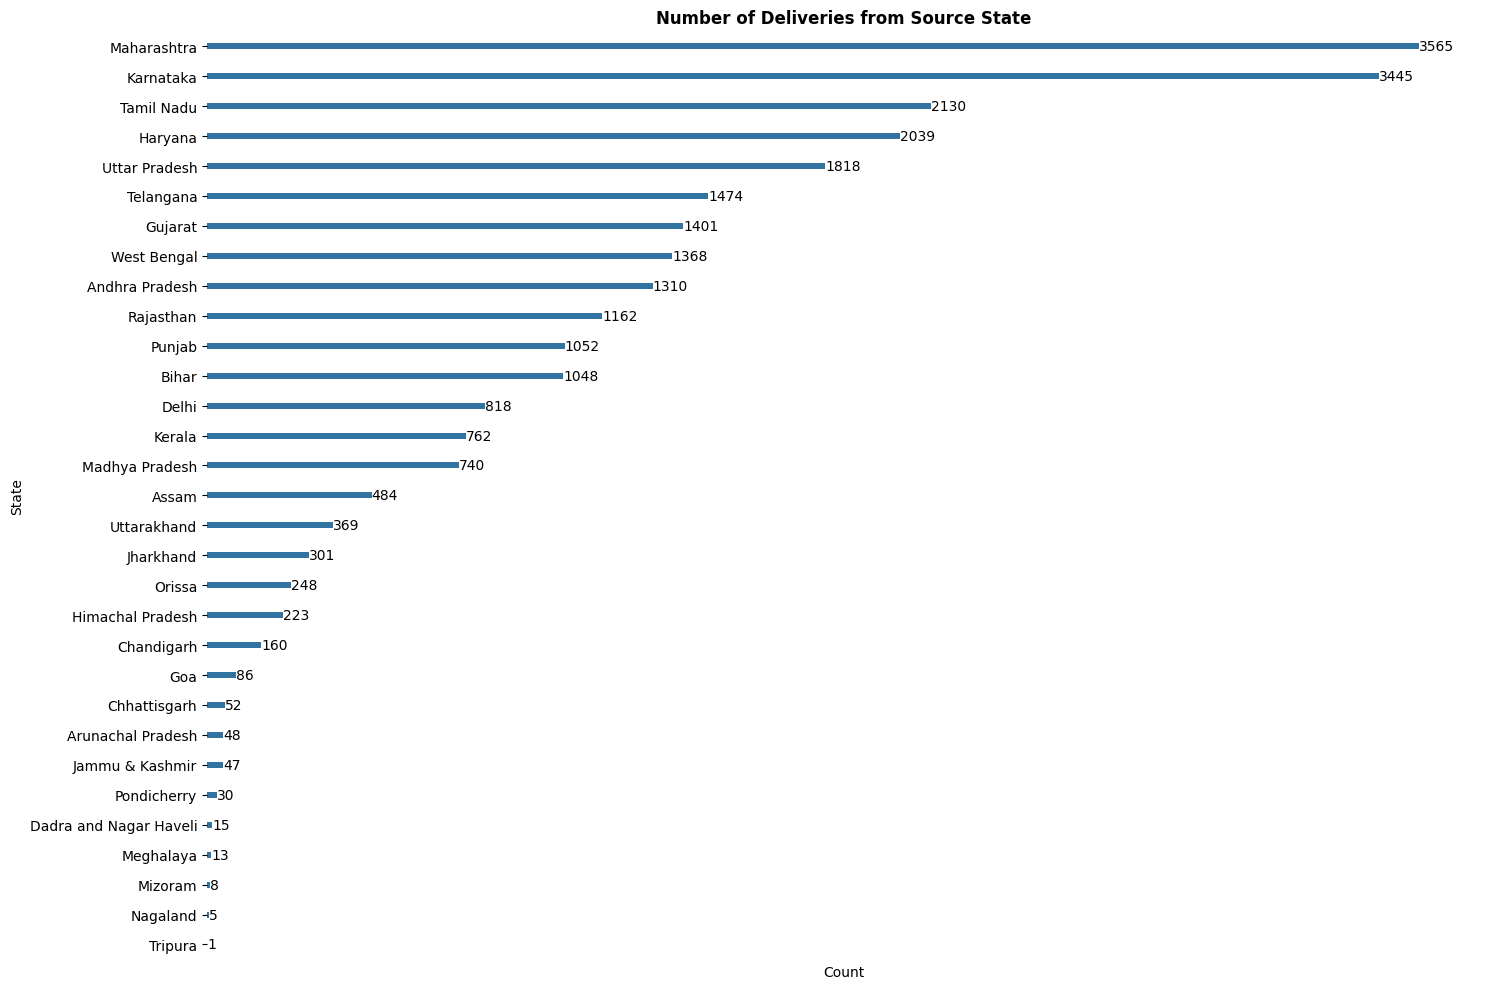

In [ ]:
state_counts = df['source_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source State',fontsize=12,fontweight='bold')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

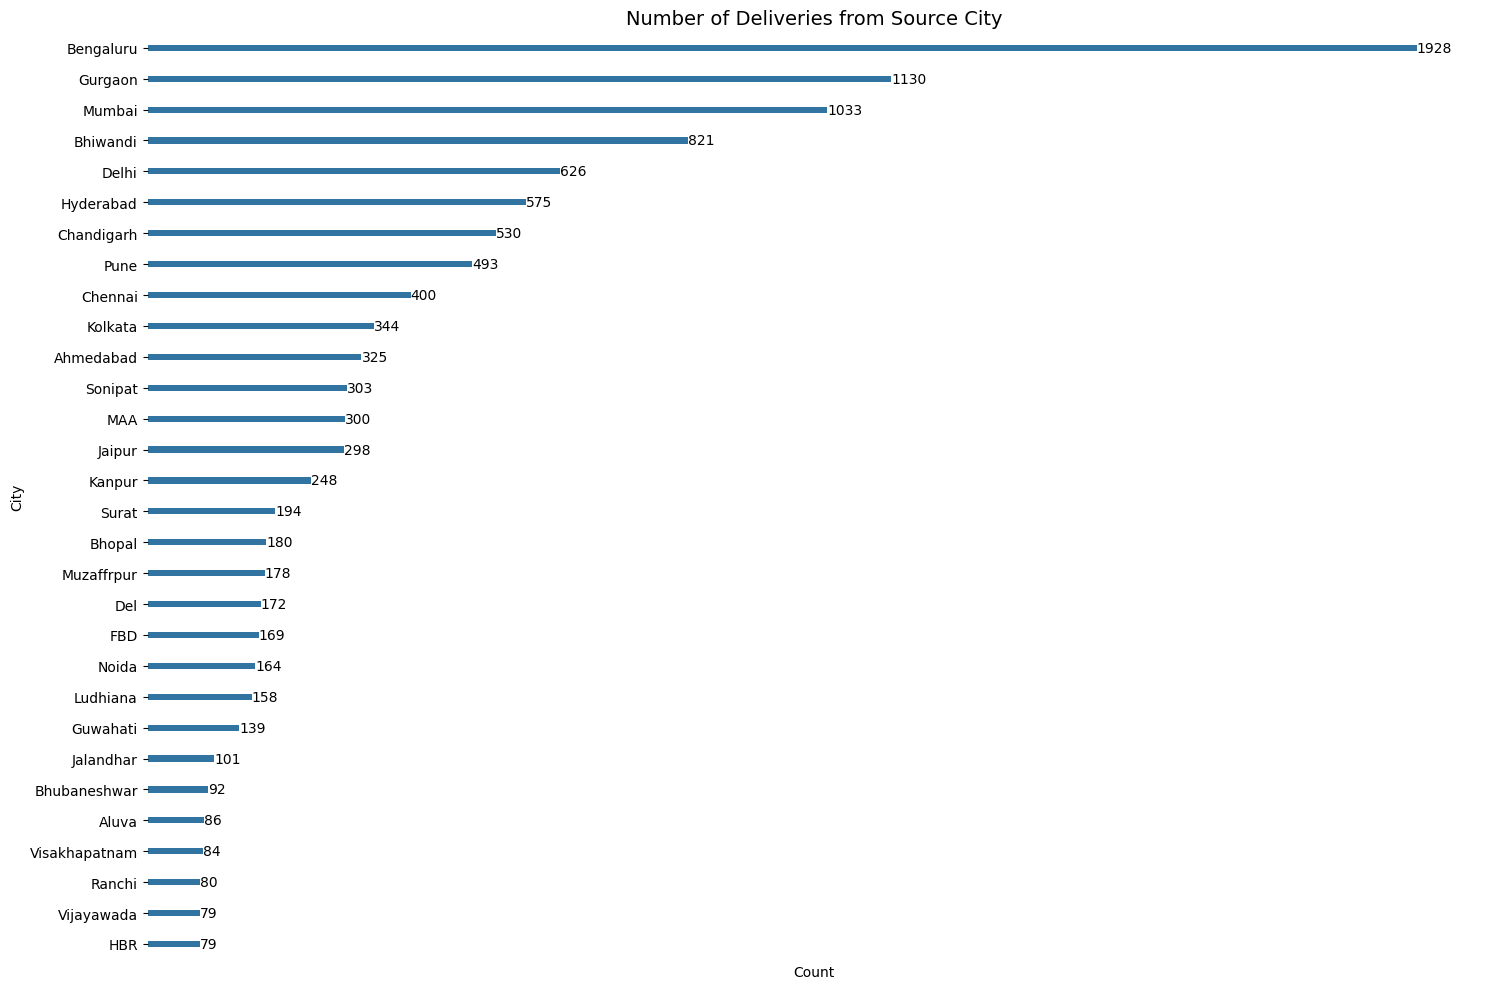

In [ ]:
city_counts = df['source_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source City',fontsize=14)
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

**Insights:**
- Maharashtra, Karnataka ,Tamil Nadu, Haryana, and Uttar Pradesh are the top states where maximum bookings are recorded.

- Cities like Bengaluru, Gurgaon, Mumbai, Bhiwandi, Delhi, Hyderabad where the major number of booking's are recorded.

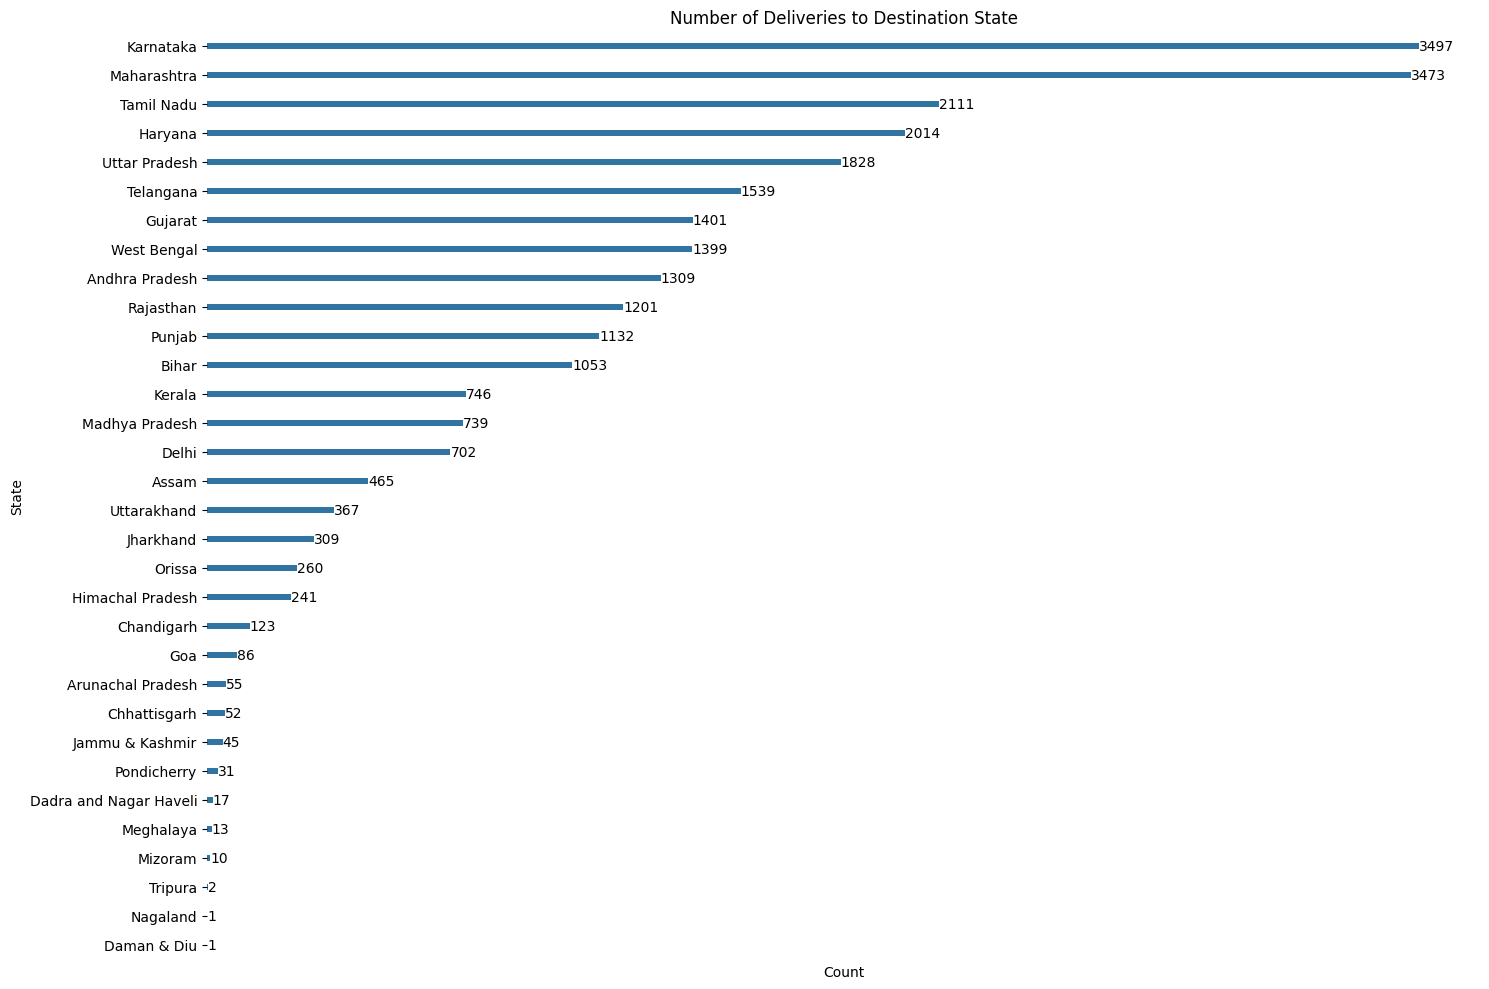

In [ ]:
state_counts = df['destination_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries to Destination State',fontsize=12)
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

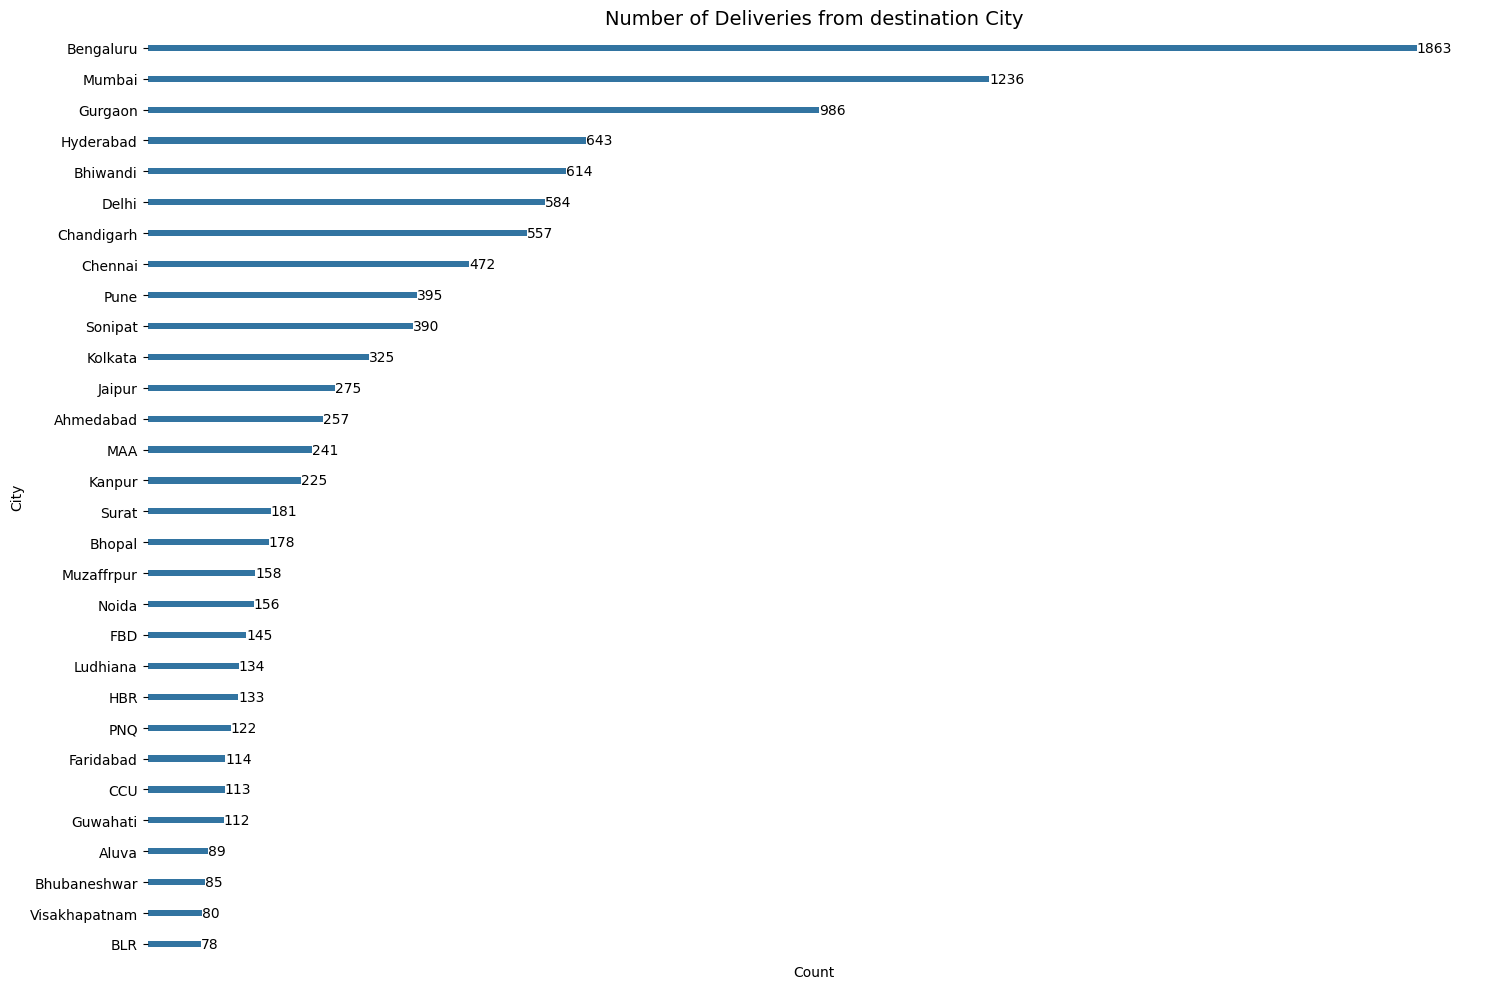

In [ ]:
city_counts = df['destination_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from destination City',fontsize=14)
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

**Insights:**
- States like Karnataka, Maharashtra, Tamil Nadu, Haryana, and Uttar Pradesh where maximum packages are received.

- Cities like Bengaluru, Mumbai, Gurgaon, Bhiwandi, Hyderabad, Delhi where the major number of booking's are received.

In [ ]:
df['corridor'] = df['source_name'] +' <---> '+ df['destination_name']
df['corridor'].value_counts()

corridor
Bangalore_Nelmngla_H (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka)            151
Bangalore_Nelmngla_H (Karnataka) <---> Bengaluru_Bomsndra_HB (Karnataka)            127
Bengaluru_Bomsndra_HB (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka)           121
Bengaluru_KGAirprt_HB (Karnataka) <---> Bangalore_Nelmngla_H (Karnataka)            108
Pune_Tathawde_H (Maharashtra) <---> Bhiwandi_Mankoli_HB (Maharashtra)               107
                                                                                   ... 
Ongole_SubhVRTL_I (Andhra Pradesh) <---> Kandukur_LICOffce_D (Andhra Pradesh)         1
Madnapalle_PngnrRd_D (Andhra Pradesh) <---> Palamaner_Lakshmi_D (Andhra Pradesh)      1
Dharmavram_SaiNgr_D (Andhra Pradesh) <---> Kadiri_GVManu_D (Andhra Pradesh)           1
Baharampur_Chuanpur_I (West Bengal) <---> Chapra_NagarDPP_D (West Bengal)             1
Jaipur_NgrNigam_DC (Rajasthan) <---> Jaipur_Central_D_1 (Rajasthan)                   1
Name: count, Length: 27

In [ ]:
df['state_corridor'] = df['source_state']+'--'+df['source_city'] +' <---> '+ df['destination_state']+'--'+df['destination_city']
df['state_corridor'].value_counts()

state_corridor
Karnataka--Bengaluru <---> Karnataka--Bengaluru                   1413
Maharashtra--Mumbai <---> Maharashtra--Mumbai                      622
Maharashtra--Bhiwandi <---> Maharashtra--Mumbai                    512
Maharashtra--Mumbai <---> Maharashtra--Bhiwandi                    345
Telangana--Hyderabad <---> Telangana--Hyderabad                    316
                                                                  ... 
Gujarat--Jetpur <---> Gujarat--Dhoraji                               1
Andhra Pradesh--Anakapalle <---> Andhra Pradesh--Visakhapatnam       1
Andhra Pradesh--Narsiptnm <---> Andhra Pradesh--Anakapalle           1
West Bengal--MirzapurWB <---> West Bengal--Kolkata                   1
Uttar Pradesh--Anandnagar <---> Uttar Pradesh--Gorakhpur             1
Name: count, Length: 2302, dtype: int64

In [ ]:
df['city_corridor'] = df['source_city']+'--'+df['source_place'] +' <---> '+ df['destination_city']+'--'+df['destination_place']
df['city_corridor'].value_counts()

city_corridor
Bengaluru--Nelmngla_H <---> Bengaluru--KGAirprt_HB     151
Bengaluru--Nelmngla_H <---> Bengaluru--Bomsndra_HB     127
Bengaluru--Bomsndra_HB <---> Bengaluru--KGAirprt_HB    121
Bengaluru--KGAirprt_HB <---> Bengaluru--Nelmngla_H     108
Pune--Tathawde_H <---> Bhiwandi--Mankoli_HB            107
                                                      ... 
Ongole--SubhVRTL_I <---> Kandukur--LICOffce_D            1
Madnapalle--PngnrRd_D <---> Palamaner--Lakshmi_D         1
Dharmavram--SaiNgr_D <---> Kadiri--GVManu_D              1
Baharampur--Chuanpur_I <---> Chapra--NagarDPP_D          1
Jaipur--NgrNigam_DC <---> Jaipur--Central_D_1            1
Name: count, Length: 2741, dtype: int64

In [ ]:
# 4. Extracting features like month, year, day, etc. from Trip_creation_time
df['trip_creation_month'] = df['trip_creation_time'].dt.month
df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_day'] = df['trip_creation_time'].dt.day
df['trip_creation_hour'] = df['trip_creation_time'].dt.hour
df['trip_creation_weekday'] = df['trip_creation_time'].dt.weekday
df['trip_creation_week'] = df['trip_creation_time'].dt.isocalendar().week
df

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_state,corridor,state_corridor,city_corridor,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,Haryana,Kanpur_Central_H_6 (Uttar Pradesh) <---> Gurga...,Uttar Pradesh--Kanpur <---> Haryana--Gurgaon,Kanpur--Central_H_6 <---> Gurgaon--Bilaspur_HB,9,2018,12,0,2,37
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,Uttar Pradesh,Bhopal_Trnsport_H (Madhya Pradesh) <---> Kanpu...,Madhya Pradesh--Bhopal <---> Uttar Pradesh--Ka...,Bhopal--Trnsport_H <---> Kanpur--Central_H_6,9,2018,12,0,2,37
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,Karnataka,Doddablpur_ChikaDPP_D (Karnataka) <---> Chikbl...,Karnataka--Doddablpur <---> Karnataka--Chikblapur,Doddablpur--ChikaDPP_D <---> Chikblapur--Shnti...,9,2018,12,0,2,37
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,Karnataka,Tumkur_Veersagr_I (Karnataka) <---> Doddablpur...,Karnataka--Tumkur <---> Karnataka--Doddablpur,Tumkur--Veersagr_I <---> Doddablpur--ChikaDPP_D,9,2018,12,0,2,37
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,Punjab,Gurgaon_Bilaspur_HB (Haryana) <---> Chandigarh...,Haryana--Gurgaon <---> Punjab--Chandigarh,Gurgaon--Bilaspur_HB <---> Chandigarh--Mehmdpur_H,9,2018,12,0,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,...,Tamil Nadu,Tirchchndr_Shnmgprm_D (Tamil Nadu) <---> Thisa...,Tamil Nadu--Tirchchndr <---> Tamil Nadu--Thisa...,Tirchchndr--Shnmgprm_D <---> Thisayanvilai--Ud...,10,2018,3,23,2,40
26218,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,...,Tamil Nadu,Peikulam_SriVnktpm_D (Tamil Nadu) <---> Tirune...,Tamil Nadu--Peikulam <---> Tamil Nadu--Tirunel...,Peikulam--SriVnktpm_D <---> Tirunelveli--Vdkku...,10,2018,3,23,2,40
26219,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,...,Tamil Nadu,Eral_Busstand_D (Tamil Nadu) <---> Tirchchndr_...,Tamil Nadu--Eral <---> Tamil Nadu--Tirchchndr,Eral--Busstand_D <---> Tirchchndr--Shnmgprm_D,10,2018,3,23,2,40
26220,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.16694

##**4. In-depth analysis:**
1. Grouping and Aggregating at Trip-level
 - Groups the **segment** data by the **trip_uuid** column to focus on aggregating data at the trip level.
 - Apply suitable aggregation functions like **first, last**, and **sum** specified in
  the **create_trip_dict** dictionary to calculate summary statistics for each trip.
2. Outlier Detection & Treatment
  - Find any existing outliers in numerical features.
  - Visualize the outlier values using **Boxplot**.
  - Handle the outliers using the **IQR** method.
3. Perform one-hot encoding on categorical features.
4. Normalize/ Standardize the numerical features using **MinMaxScaler** or **StandardScaler**.


In [ ]:
create_trip_dict={
 'data' : 'first',
 'route_type' : 'first',
 'od_start_time':'first',
 'od_end_time':'last',
 'od_time_diff_hour' : 'sum',
 'trip_creation_time' : 'first',
 'trip_creation_month' : 'first',
 'trip_creation_year' : 'first',
 'trip_creation_day' : 'first',
 'trip_creation_hour' : 'first',
 'trip_creation_weekday' : 'first',
 'trip_creation_week' : 'first',
 'start_scan_to_end_scan' : 'sum',
 'actual_distance_to_destination' : 'sum',
 'actual_time' : 'sum',
 'osrm_time' : 'sum',
 'osrm_distance' : 'sum',
 'segment_actual_time': 'sum',
 'segment_osrm_time': 'sum',
 'segment_osrm_distance': 'sum',
 'segment_actual_time_sum': 'sum',
 'segment_osrm_time_sum': 'sum',
 'segment_osrm_distance_sum': 'sum',
 'source_name': 'first',
 'source_city':'first',
 'source_state':'first',
 'source_place':'first',
 'destination_name': 'first',
 'destination_city':'first',
 'destination_state':'first',
 'destination_place':'first',
 'corridor':'first',
 'state_corridor':'first',
 'city_corridor':'first'
 }
df = df.groupby('trip_uuid').agg(create_trip_dict).reset_index()
df

,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,...,source_city,source_state,source_place,destination_name,destination_city,destination_state,destination_place,corridor,state_corridor,city_corridor
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.668497,2018-09-12 00:00:16.535741,9,2018,12,...,Kanpur,Uttar Pradesh,Central_H_6,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur_HB,Kanpur_Central_H_6 (Uttar Pradesh) <---> Gurga...,Uttar Pradesh--Kanpur <---> Haryana--Gurgaon,Kanpur--Central_H_6 <---> Gurgaon--Bilaspur_HB
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,3.026865,2018-09-12 00:00:22.886430,9,2018,12,...,Doddablpur,Karnataka,ChikaDPP_D,Chikblapur_ShntiSgr_D (Karnataka),Chikblapur,Karnataka,ShntiSgr_D,Doddablpur_ChikaDPP_D (Karnataka) <---> Chikbl...,Karnataka--Doddablpur <---> Karnataka--Chikblapur,Doddablpur--ChikaDPP_D <---> Chikblapur--Shnti...
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,65.572709,2018-09-12 00:00:33.691250,9,2018,12,...,Gurgaon,Haryana,Bilaspur_HB,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur_H,Gurgaon_Bilaspur_HB (Haryana) <---> Chandigarh...,Haryana--Gurgaon <---> Punjab--Chandigarh,Gurgaon--Bilaspur_HB <---> Chandigarh--Mehmdpur_H
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.674916,2018-09-12 00:01:00.113710,9,2018,12,...,Mumbai,Maharashtra,Hub,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,MiraRd_IP,Mumbai Hub (Maharashtra) <---> Mumbai_MiraRd_I...,Maharashtra--Mumbai <---> Maharashtra--Mumbai,Mumbai--Hub <---> Mumbai--MiraRd_IP
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.972484,2018-09-12 00:02:09.740725,9,2018,12,...,Bellary,Karnataka,Dc,Hospet (Karnataka),Hospet,Karnataka,Hospet,Bellary_Dc (Karnataka) <---> Hospet (Karnataka),Karnataka--Bellary <---> Karnataka--Hospet,Bellary--Dc <---> Hospet--Hospet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,4.300482,2018-10-03 23:55:56.258533,10,2018,3,...,Chandigarh,Punjab,Mehmdpur_H,Zirakpur_DC (Punjab),Zirakpur,Punjab,DC,Chandigarh_Mehmdpur_H (Punjab) <---> Zirakpur_...,Punjab--Chandigarh <---> Punjab--Zirakpur,Chandigarh--Mehmdpur_H <---> Zirakpur--DC
14783,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,1.009842,2018-10-03 23:57:23.863155,10,2018,3,...,FBD,Haryana,Balabhgarh_DPC,Faridabad_Blbgarh_DC (Haryana),Faridabad,Haryana,Blbgarh_DC,FBD_Balabhgarh_DPC (Haryana) <---> Faridabad_B...,Haryana--FBD <---> Haryana--Faridabad,FBD--Balabhgarh_DPC <---> Faridabad--Blbgarh_DC
14784,trip-153861106442901555,test,Carting,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,7.035331,2018-10-03 23:57:44.429324,10,2018,3,...,Kanpur,Uttar Pradesh,GovndNgr_DC,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central_H_6,Kanpur_GovndNgr_DC (Uttar Pradesh) <---> Kanpu...,Uttar Pradesh--Kanpur <---> Uttar Pradesh--Kanpur,Kanpur--GovndNgr_DC <---> Kanpur--Central_H_6
14785,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,5.808548,2018-10-03 23:59:14.390954,10,2018,3,...,Tirunelveli,Tamil Nadu,VdkkuSrt_I,Eral_Busstand_D (Tamil Nadu),Eral,Tamil Nadu,Busstand_D,Tirunelveli_VdkkuSrt_I (Tamil Nadu) <---> Eral...,Tamil Nadu--Tirunelveli <---> Tamil Nadu--Eral,Tirunelveli--VdkkuSrt_I <---> Eral--Busstand_D


In [ ]:
# Extracting Numerical Columns
numerical_columns = df.select_dtypes(include=[np.float32, np.float64])
numerical_columns

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,37.668497,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,1548.0,1008.0,1320.4733
1,3.026865,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,141.0,65.0,84.1894
2,65.572709,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3308.0,1941.0,2545.2678
3,1.674916,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,59.0,16.0,19.8766
4,11.972484,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,4.300482,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,82.0,62.0,64.8551
14783,1.009842,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,21.0,11.0,16.0883
14784,7.035331,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,281.0,88.0,104.8866
14785,5.808548,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,258.0,221.0,223.5324


In [ ]:
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
od_time_diff_hour,14787.0,8.840187,10.978880,0.391024,2.494975,4.661846,10.558962,131.642533
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400
segment_actual_time_sum,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000


In [ ]:
df.trip_creation_year.value_counts()

trip_creation_year
2018    14787
Name: count, dtype: int64

In [ ]:
df.trip_creation_month.value_counts()

trip_creation_month
9     13011
10     1776
Name: count, dtype: int64

In [ ]:
df.trip_creation_week.value_counts()

trip_creation_week
38    5001
39    4402
37    3608
40    1776
Name: count, dtype: Int64

In [ ]:
df.trip_creation_weekday.value_counts()

trip_creation_weekday
2    2731
5    2128
3    2103
4    2057
1    2035
0    1980
6    1753
Name: count, dtype: int64

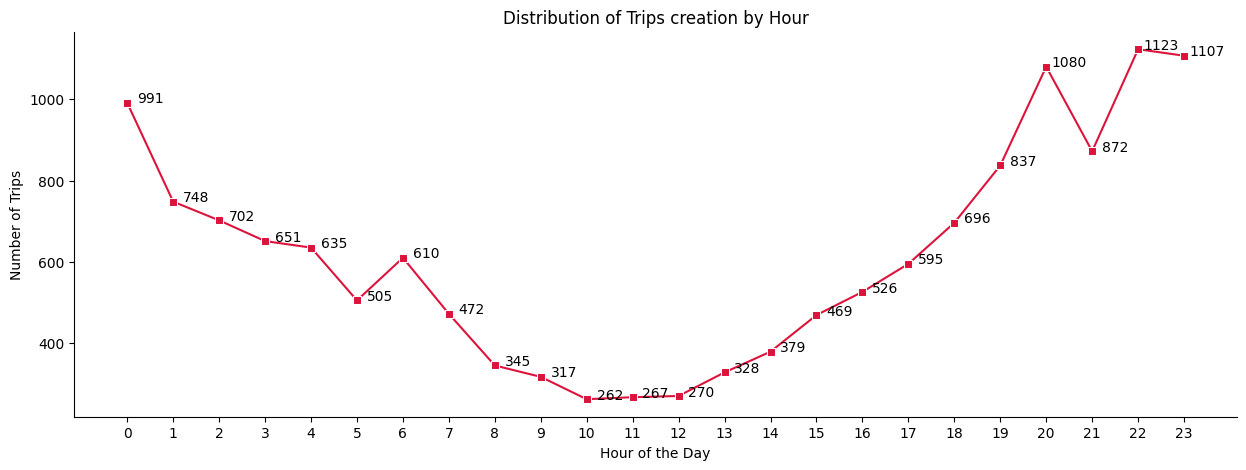

In [ ]:
trip_creation_by_hour = df.groupby(by='trip_creation_hour')['trip_uuid'].count().reset_index()
plt.figure(figsize=(15,5))

sns.lineplot(data=trip_creation_by_hour, x='trip_creation_hour', y='trip_uuid', marker='s', color='crimson')
plt.xticks(np.arange(0, 24))

for i, count in enumerate(trip_creation_by_hour['trip_uuid']):
 plt.text(trip_creation_by_hour['trip_creation_hour'][i]+0.5, count, count, ha='center')

plt.title('Distribution of Trips creation by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()


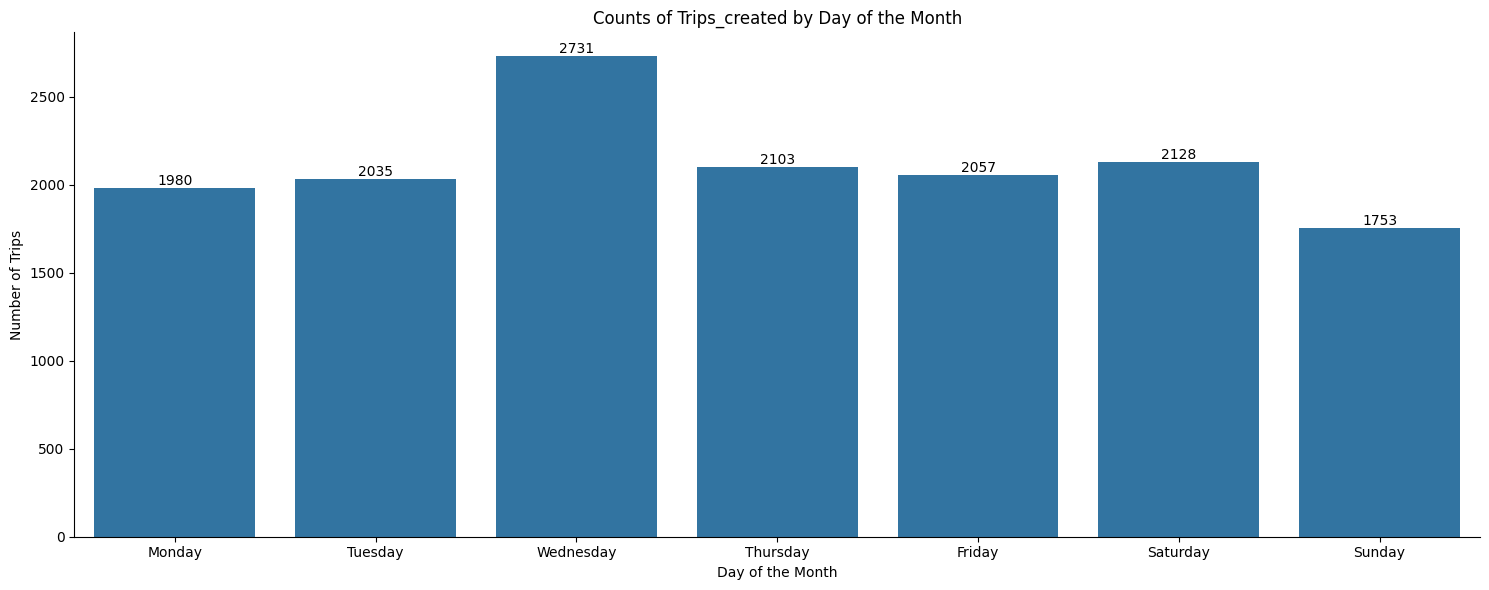

In [ ]:
trip_creation_day_week = df['trip_creation_time'].dt.day_name()

plt.figure(figsize=(15,6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = trip_creation_day_week.value_counts().reindex(weekday_order)

sns.barplot(x=day_counts.index, y=day_counts.values)
for i, count in enumerate(day_counts.values):
 plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Counts of Trips_created by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.tight_layout()
sns.despine()
plt.show()

**Outlier Treatment**

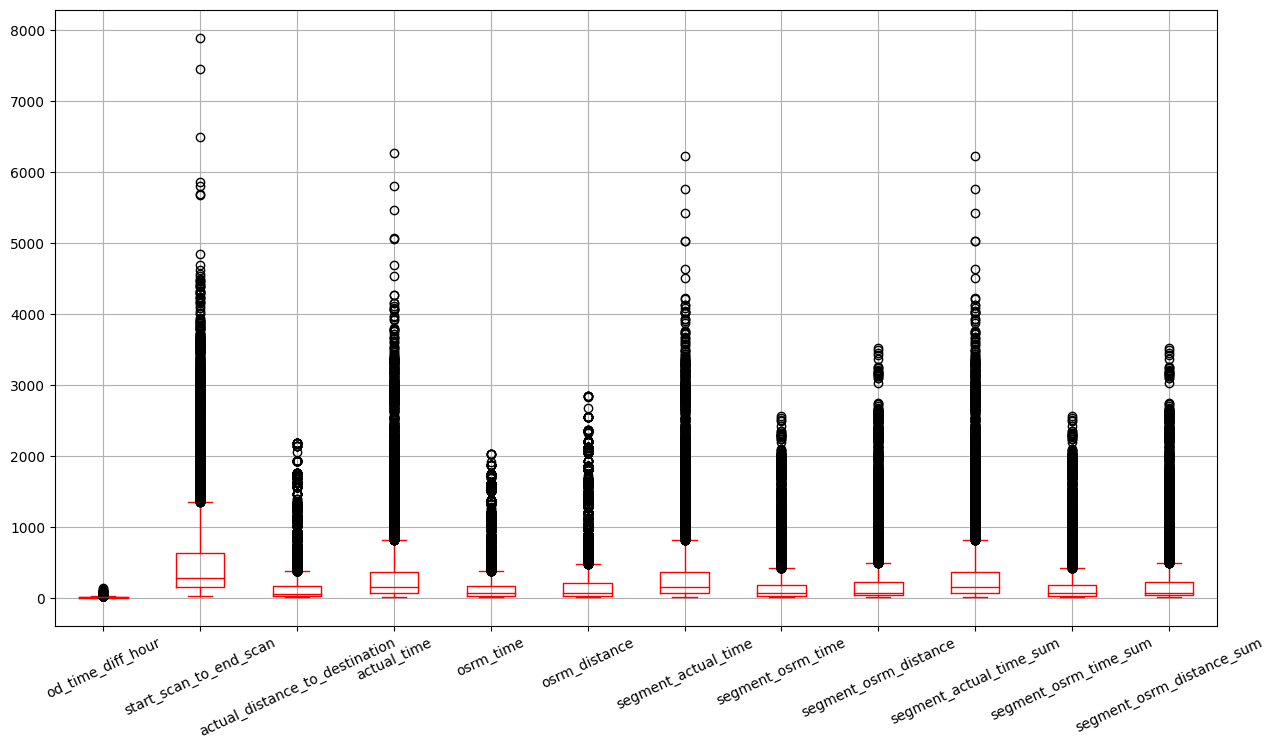

In [ ]:
plt.figure(figsize=(15, 8))
numerical_columns.boxplot(rot=25, figsize=(35,20), color = 'r')
plt.grid('off')
plt.show()

In [ ]:
# obtain the first quartile
Q1 = numerical_columns.quantile(0.25)
# obtain the third quartile
Q3 = numerical_columns.quantile(0.75)
# obtain the IQR
IQR = Q3 - Q1
# print the IQR
print(IQR)

od_time_diff_hour                   8.063987
start_scan_to_end_scan            483.000000
actual_distance_to_destination    140.814159
actual_time                       300.000000
osrm_time                         139.000000
osrm_distance                     175.887300
segment_actual_time               298.000000
segment_osrm_time                 154.000000
segment_osrm_distance             183.981750
segment_actual_time_sum           298.000000
segment_osrm_time_sum             154.000000
segment_osrm_distance_sum         183.981750
dtype: float64


**Outlier Removal**

In [ ]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

clipped_data = np.clip(numerical_columns, lower_bound, upper_bound, axis = 1)

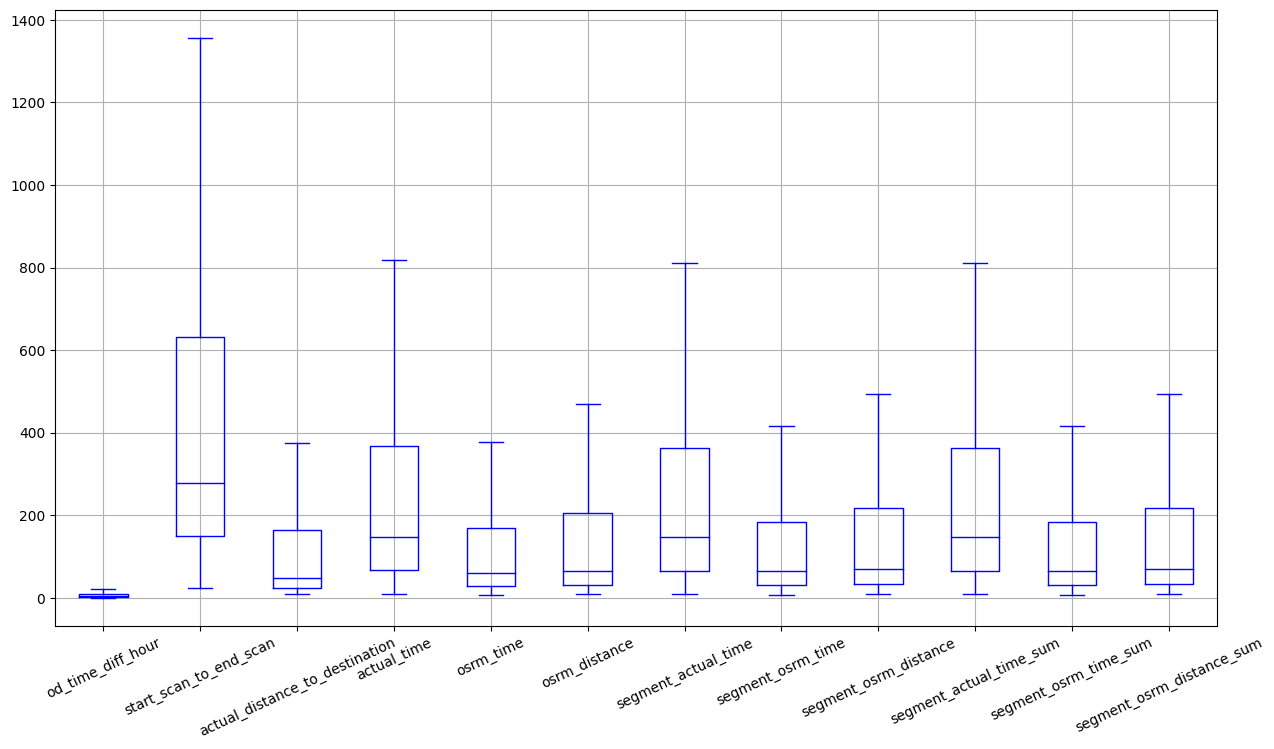

In [ ]:
plt.figure(figsize=(15, 8))
clipped_data.boxplot(rot=25, figsize=(35,20), color = 'b')
plt.grid('off')
plt.show()

**Insights:**
- Here we can see the data after removing outliers.
- Clipped data replaces the outlier values with specified values.

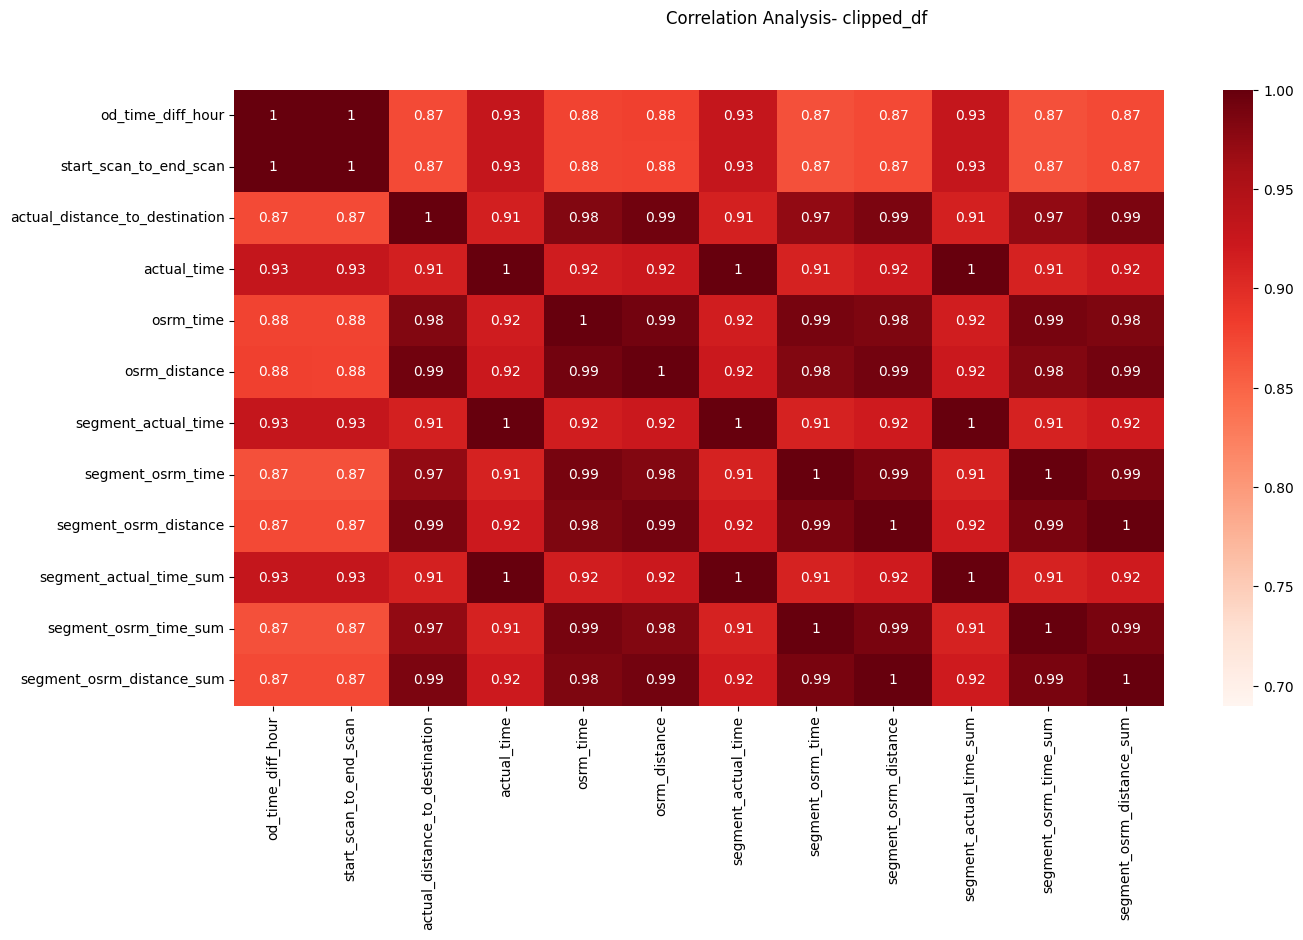

In [ ]:
clipped_df_corr = clipped_data.corr()
plt.figure(figsize = (15,8))
plt.suptitle(f'Correlation Analysis- clipped_df')
sns.heatmap(data = clipped_df_corr,vmin=0.69, annot = True, cmap='Reds')
plt.show()

**One Hot Encoding**

In [ ]:
categorical_cols = ['data','route_type']

# one hot encoding the categorical features
ohe = OneHotEncoder(sparse=False)
encoded_cat_cols = ohe.fit_transform(df[categorical_cols])
categorical_encoded_df = pd.DataFrame(encoded_cat_cols, columns=ohe.get_feature_names_out(categorical_cols))
display(categorical_encoded_df)
encoded_df = pd.concat([df,categorical_encoded_df],axis=1)
encoded_df

,data_test,data_training,route_type_Carting,route_type_FTL
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
14782,1.0,0.0,1.0,0.0
14783,1.0,0.0,1.0,0.0
14784,1.0,0.0,1.0,0.0
14785,1.0,0.0,1.0,0.0


,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,...,destination_city,destination_state,destination_place,corridor,state_corridor,city_corridor,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.668497,2018-09-12 00:00:16.535741,9,2018,12,...,Gurgaon,Haryana,Bilaspur_HB,Kanpur_Central_H_6 (Uttar Pradesh) <---> Gurga...,Uttar Pradesh--Kanpur <---> Haryana--Gurgaon,Kanpur--Central_H_6 <---> Gurgaon--Bilaspur_HB,0.0,1.0,0.0,1.0
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,3.026865,2018-09-12 00:00:22.886430,9,2018,12,...,Chikblapur,Karnataka,ShntiSgr_D,Doddablpur_ChikaDPP_D (Karnataka) <---> Chikbl...,Karnataka--Doddablpur <---> Karnataka--Chikblapur,Doddablpur--ChikaDPP_D <---> Chikblapur--Shnti...,0.0,1.0,1.0,0.0
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,65.572709,2018-09-12 00:00:33.691250,9,2018,12,...,Chandigarh,Punjab,Mehmdpur_H,Gurgaon_Bilaspur_HB (Haryana) <---> Chandigarh...,Haryana--Gurgaon <---> Punjab--Chandigarh,Gurgaon--Bilaspur_HB <---> Chandigarh--Mehmdpur_H,0.0,1.0,0.0,1.0
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.674916,2018-09-12 00:01:00.113710,9,2018,12,...,Mumbai,Maharashtra,MiraRd_IP,Mumbai Hub (Maharashtra) <---> Mumbai_MiraRd_I...,Maharashtra--Mumbai <---> Maharashtra--Mumbai,Mumbai--Hub <---> Mumbai--MiraRd_IP,0.0,1.0,1.0,0.0
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.972484,2018-09-12 00:02:09.740725,9,2018,12,...,Hospet,Karnataka,Hospet,Bellary_Dc (Karnataka) <---> Hospet (Karnataka),Karnataka--Bellary <---> Karnataka--Hospet,Bellary--Dc <---> Hospet--Hospet,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,4.300482,2018-10-03 23:55:56.258533,10,2018,3,...,Zirakpur,Punjab,DC,Chandigarh_Mehmdpur_H (Punjab) <---> Zirakpur_...,Punjab--Chandigarh <---> Punjab--Zirakpur,Chandigarh--Mehmdpur_H <---> Zirakpur--DC,1.0,0.0,1.0,0.0
14783,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,1.009842,2018-10-03 23:57:23.863155,10,2018,3,...,Faridabad,Haryana,Blbgarh_DC,FBD_Balabhgarh_DPC (Haryana) <---> Faridabad_B...,Haryana--FBD <---> Haryana--Faridabad,FBD--Balabhgarh_DPC <---> Faridabad--Blbgarh_DC,1.0,0.0,1.0,0.0
14784,trip-153861106442901555,test,Carting,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,7.035331,2018-10-03 23:57:44.429324,10,2018,3,...,Kanpur,Uttar Pradesh,Central_H_6,Kanpur_GovndNgr_DC (Uttar Pradesh) <---> Kanpu...,Uttar Pradesh--Kanpur <---> Uttar Pradesh--Kanpur,Kanpur--GovndNgr_DC <---> Kanpur--Central_H_6,1.0,0.0,1.0,0.0
14785,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,5.808548,2018-10-03 23:59:14.390954,10,2018,3,...,Eral,Tamil Nadu,Busstand_D,Tirunelveli_VdkkuSrt_I (Tamil Nadu) <---> Eral...,Tamil Nadu--Tirunelveli <---> Tamil Nadu--Eral,Tirunelveli--VdkkuSrt_I <---> Eral--Busstand_D,1.0,0.0,1.0,0.0


**Min-Max Scaler**

In [ ]:
num_cols = numerical_columns.columns.tolist()
# Normalizing/Standardizing the numerical features using MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_numerical = min_max_scaler.fit_transform(numerical_columns)

# Converting the scaled features back to a dataframe
min_max_scaled_df = pd.DataFrame(min_max_scaled_numerical, columns = num_cols)
min_max_scaled_df

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,0.284016,0.283937,0.374613,0.248242,0.350938,0.346972,0.247388,0.391712,0.373134,0.247388,0.391712,0.373134
1,0.020082,0.019937,0.029476,0.021419,0.030602,0.026859,0.021218,0.023065,0.021373,0.021218,0.023065,0.021373
2,0.496617,0.496508,0.880999,0.533568,0.855874,0.828325,0.530301,0.756450,0.721625,0.530301,0.756450,0.721625
3,0.009782,0.009778,0.003753,0.007992,0.004442,0.003747,0.008037,0.003909,0.003074,0.008037,0.003909,0.003074
4,0.088239,0.088127,0.054395,0.053069,0.054788,0.048647,0.053207,0.042611,0.039185,0.053207,0.042611,0.039185
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,0.029786,0.029714,0.022392,0.011829,0.027641,0.022745,0.011734,0.021892,0.015872,0.011734,0.021892,0.015872
14783,0.004715,0.004698,0.002990,0.001918,0.002962,0.002478,0.001929,0.001955,0.001996,0.001929,0.001955,0.001996
14784,0.050623,0.050540,0.013631,0.043638,0.020731,0.017602,0.043723,0.032056,0.027262,0.043723,0.032056,0.027262
14785,0.041276,0.041143,0.057736,0.040761,0.085390,0.057237,0.040026,0.084050,0.061020,0.040026,0.084050,0.061020


In [ ]:
# Standardization works only with data which follows normal distribution
# Standardizing the numerical features using StandardScaler
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(numerical_columns)

# Converting the scaled features back to a dataframe
std_scaled_df = pd.DataFrame(std_scaled, columns = num_cols)
std_scaled_df

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,2.625886,2.627598,2.162548,2.147277,2.048290,2.125107,2.147833,2.629714,2.633597,2.147833,2.629714,2.633597
1,-0.529518,-0.530859,-0.297563,-0.379887,-0.342571,-0.320538,-0.381163,-0.367090,-0.332307,-0.381163,-0.367090,-0.332307
2,5.167598,5.170772,5.772034,5.326268,5.816936,5.802622,5.311326,5.594737,5.571936,5.311326,5.594737,5.571936
3,-0.652664,-0.652397,-0.480911,-0.529486,-0.537818,-0.497115,-0.528553,-0.522809,-0.486596,-0.528553,-0.522809,-0.486596
4,0.285312,0.284962,-0.119943,-0.027259,-0.162059,-0.154082,-0.023473,-0.208192,-0.182120,-0.023473,-0.208192,-0.182120
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,-0.413508,-0.413880,-0.348054,-0.486744,-0.364674,-0.351972,-0.487212,-0.376623,-0.378690,-0.487212,-0.376623,-0.378690
14783,-0.713243,-0.713166,-0.486350,-0.597162,-0.548870,-0.506808,-0.596856,-0.538699,-0.495684,-0.596856,-0.538699,-0.495684
14784,-0.164399,-0.164728,-0.410502,-0.132335,-0.416249,-0.391263,-0.129522,-0.293997,-0.282653,-0.129522,-0.293997,-0.282653
14785,-0.276143,-0.277150,-0.096128,-0.164392,0.066344,-0.088455,-0.170863,0.128670,0.001984,-0.170863,0.128670,0.001984


##**5. Hypothesis Testing:**

1. Perform hypothesis testing / visual analysis between :

  - actual_time aggregated value and OSRM time aggregated value.
  - actual_time aggregated value and segment actual time aggregated
  value.
  - OSRM distance aggregated value and segment OSRM distance
  aggregated value.
  - OSRM time aggregated value and segment OSRM time aggregated
  value.
2. **Note:** Aggregated values are the values you’ll get after merging the rows on the basis of **trip_uuid**.


In [ ]:
df.head()

,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,...,source_city,source_state,source_place,destination_name,destination_city,destination_state,destination_place,corridor,state_corridor,city_corridor
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.668497,2018-09-12 00:00:16.535741,9,2018,12,...,Kanpur,Uttar Pradesh,Central_H_6,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur_HB,Kanpur_Central_H_6 (Uttar Pradesh) <---> Gurga...,Uttar Pradesh--Kanpur <---> Haryana--Gurgaon,Kanpur--Central_H_6 <---> Gurgaon--Bilaspur_HB
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,3.026865,2018-09-12 00:00:22.886430,9,2018,12,...,Doddablpur,Karnataka,ChikaDPP_D,Chikblapur_ShntiSgr_D (Karnataka),Chikblapur,Karnataka,ShntiSgr_D,Doddablpur_ChikaDPP_D (Karnataka) <---> Chikbl...,Karnataka--Doddablpur <---> Karnataka--Chikblapur,Doddablpur--ChikaDPP_D <---> Chikblapur--Shnti...
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,65.572709,2018-09-12 00:00:33.691250,9,2018,12,...,Gurgaon,Haryana,Bilaspur_HB,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur_H,Gurgaon_Bilaspur_HB (Haryana) <---> Chandigarh...,Haryana--Gurgaon <---> Punjab--Chandigarh,Gurgaon--Bilaspur_HB <---> Chandigarh--Mehmdpur_H
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.674916,2018-09-12 00:01:00.113710,9,2018,12,...,Mumbai,Maharashtra,Hub,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,MiraRd_IP,Mumbai Hub (Maharashtra) <---> Mumbai_MiraRd_I...,Maharashtra--Mumbai <---> Maharashtra--Mumbai,Mumbai--Hub <---> Mumbai--MiraRd_IP
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.972484,2018-09-12 00:02:09.740725,9,2018,12,...,Bellary,Karnataka,Dc,Hospet (Karnataka),Hospet,Karnataka,Hospet,Bellary_Dc (Karnataka) <---> Hospet (Karnataka),Karnataka--Bellary <---> Karnataka--Hospet,Bellary--Dc <---> Hospet--Hospet


**Hypothesis Testing between Actual_time aggregated value and OSRM time aggregated value**

- **Formulating Null and Alternate Hypothesis:**

  - H0: Mean of OSRM time >= Mean of Actual time taken to complete delivery
  - Ha: Mean of OSRM time <  Mean of Actual time taken to complete delivery

In [ ]:
# Shapiro-Wilk Test for Normality

# Null Hypothesis(H0) : Data is Normally distributed
# Alternate Hypothesis(Ha) : Data is not Normally distributed

#Shapiro-Wilk Test for actual_time
shapiro_stat,p_value = stats.shapiro(df['actual_time'])
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat, p_value))

if p_value < alpha:
  print("Reject H0: Data is not Normally distributed")
else:
  print("Failed to reject H0: Data is Normally distributed")

#Shapiro-Wilk Test for osrm_time
shapiro_stat,p_value = stats.shapiro(df['osrm_time'])
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat, p_value))

if p_value < alpha:
  print("Reject H0: Data is not Normally distributed")
else:
  print("Failed to reject H0: Data is Normally distributed")

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.5803500413894653, and p-value: 0.0
Reject H0: Data is not Normally distributed
Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.5457271337509155, and p-value: 0.0
Reject H0: Data is not Normally distributed


In [ ]:
# Levene's Test
# Null Hypothesis(H0) : Variences are Equal.
# Alternate Hypothesis(Ha) : Variences are not Equal.

levene_stat,p_value = stats.levene(df["actual_time"], df["osrm_time"])
alpha = 0.05
print("Confidence Interval: 95%")
print("Levene's test with Test Statistic: {}, and p-value: {}".format(levene_stat,p_value))

if p_value < alpha:
  print("Reject H0: Variences are not Equal")
else:
  print("Failed to reject H0: Variences are Equal")


Confidence Interval: 95%
Levene's test with Test Statistic: 1013.8463480511717, and p-value: 8.743536461316657e-219
Reject H0: Variences are not Equal


**Insights:**

- From the Shapiro-Wilk test we can conclude that the data is not Normally distributed.
- From Levene's test we can conclude that the varience are not equal among the groups.
- Since the data is not normally distributed and variences among the two groups are not equal we can perform non-parametric Kruskal-Wallis Test.

In [ ]:
# Implementation of Kruskal-Wallis Test
test_statistic,p_value = stats.kruskal(df["actual_time"], df["osrm_time"])
print("Kruskal-Wallis Test with Test Statistic: {}, and p-value: {}".format(test_statistic,p_value))

alpha = 0.05
print("Confidence Interval: 95%")

if p_value > alpha:
  print("Result: \nFail to reject null hypothesis.")
else:
  print("Result: \nReject null hypothesis.")

Kruskal-Wallis Test with Test Statistic: 3407.110071977555, and p-value: 0.0
Confidence Interval: 95%
Result: 
Reject null hypothesis.


Insights:

- The results from Kruskal-Wallis test indicate that the p-value is below the significance threshold of 0.05. Therefore, we reject the null hypothesis and infer that Actual Time is more than estimated OSRM time.

**Hypothesis test between actual_time aggregated value and segment actual time aggregated value.**

- **Formulating the Null and Alternate Hypothesis**

  - H0: Actual time = segment actual time
  - Ha: Actual time != segment actual time

- Since we are comparing a Numerical variable with a Categorical (With 2 Groups) variable we can use Two-Sample Independent T-test.
- To perform the Two-Sample Independent T-test, the data must follow Normal Distribution. To check this, we shall perform Shapiro-Wilk test and Levene's Test to check if the two groups have equal variences.

In [ ]:
# Shapiro-Wilk Test for Normality

# Null Hypothesis(H0) : Data is Normally distributed
# Alternate Hypothesis(Ha) : Data is not Normally distributed

#Shapiro-Wilk Test for actual_time
shapiro_stat,p_value = stats.shapiro(df['actual_time'])
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat, p_value))
if p_value < alpha:
  print("Reject H0: Data is not Normally distributed")
else:
  print("Failed to reject H0: Data is Normally distributed")

#Shapiro-Wilk Test for segment_actual_time
shapiro_stat,p_value = stats.shapiro(df['segment_actual_time'])
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat, p_value))
if p_value < alpha:
  print("Reject H0: Data is not Normally distributed")
else:
  print("Failed to reject H0: Data is Normally distributed")

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.5803500413894653, and p-value: 0.0
Reject H0: Data is not Normally distributed
Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.5808485746383667, and p-value: 0.0
Result: 
Reject H0: Data is not Normally distributed


In [ ]:
# Levene's Test
# Null Hypothesis(H0) : Variences are Equal.
# Alternate Hypothesis(Ha) : Variences are not Equal.

levene_stat,p_value = stats.levene(df['actual_time'], df['segment_actual_time'])
alpha = 0.05
print("Confidence Interval: 95%")
print("Levene's test with Test Statistic: {}, and p-value: {}".format(levene_stat,p_value))

if p_value < alpha:
  print("Reject H0: Variences are not Equal")
else:
  print("Failed to reject H0: Variences are Equal")

Confidence Interval: 95%
Levene's test with Test Statistic: 0.1523862392501683, and p-value: 0.6962681452003544
Failed to reject H0: Variences are Equal


**Insights:**

- From the Shapiro-Wilk test we can conclude that the data is not Normally distributed.
- From Levene's test we can conclude that the varience are equal among the groups.
- Since the data is not normally distributed and variences among the two groups are equal we can perform Two Sample Independent t-test.

In [ ]:
# Implementing two sample Independent t-test
t_stat, p_value = ttest_ind(df['actual_time'], df['segment_actual_time'], alternative='two-sided')

print('Test Statistic:', t_stat)
print('P value:', p_value)

alpha = 0.05
print("Confidence Interval: 95%")
if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \nThere is no difference between actual time and segment actual time")
else:
  print("Result: \nReject null hypothesis. \nThere is a difference between actual time and segment actual time")

Test Statistic: 0.499475764573994
P value: 0.6174479719707524
Confidence Interval: 95%
Result: 
Fail to reject null hypothesis. 
There is no difference between actual time and segment actual time


**Insights:**
- Since p-value is greater than 0.05 so we can not reject the Null hypothesis. - We don't have the sufficient evidence to say that There is difference between actual time and segment actual time.


**Hypothesis test between OSRM distance aggregated value and segment OSRM distance aggregated value.**

- **Formulating the Null and Alternate Hypothesis**

  - H0 : Segment OSRM distance <= OSRM distance
  - Ha : Segment OSRM distance > OSRM distance

- Since we are comparing a Numerical variable with a Categorical (With 2 Groups) variable we can use Two-Sample Independent T-test.

- To perform the Two-Sample Independent T-test, the data must follow Normal Distribution. To check this, we shall perform Shapiro-Wilk test and Levene's Test to check if the two groups have equal variences.


In [ ]:
# Shapiro-Wilk Test for Normality

# Null Hypothesis(H0) : Data is Normally distributed
# Alternate Hypothesis(Ha) : Data is not Normally distributed

#Shapiro-Wilk Test for osrm_distance
shapiro_stat,p_value = stats.shapiro(df['osrm_distance'])
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat, p_value))
if p_value < alpha:
  print("Reject H0: Data is not Normally distributed")
else:
  print("Failed to reject H0: Data is Normally distributed")

#Shapiro-Wilk Test for segment_osrm_distance
shapiro_stat,p_value = stats.shapiro(df['segment_osrm_distance'])
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat, p_value))
if p_value < alpha:
  print("Reject H0: Data is not Normally distributed")
else:
  print("Failed to reject H0: Data is Normally distributed")

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.5216470956802368, and p-value: 0.0
Reject H0: Data is not Normally distributed
Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.5071283578872681, and p-value: 0.0
Reject H0: Data is not Normally distributed


In [ ]:
# Levene's Test
# Null Hypothesis(H0) : Variences are Equal.
# Alternate Hypothesis(Ha) : Variences are not Equal.

levene_stat,p_value = stats.levene(df['osrm_distance'], df['segment_osrm_distance'])
alpha = 0.05
print("Confidence Interval: 95%")
print("Levene's test with Test Statistic: {}, and p-value: {}".format(levene_stat,p_value))

if p_value < alpha:
  print("Reject H0: Variences are not Equal")
else:
  print("Failed to reject H0: Variences are Equal")

Confidence Interval: 95%
Levene's test with Test Statistic: 13.640878396710558, and p-value: 0.00022171213513990103
Reject H0: Variences are not Equal


**Insights:**

- From the Shapiro-Wilk test we can conclude that the data is not Normally distributed.
- From Levene's test we can conclude that the varience are not equal among the groups.

In [ ]:
# Implementing two sample Independent t-test
t_stat, p_value = ttest_ind(df['osrm_distance'], df['segment_osrm_distance'], alternative='less')

print('Test Statistic:', t_stat)
print('P value:', p_value)

alpha = 0.05
print("Confidence Interval: 95%")
if p_value > alpha:
  print("Result: \nFail to reject null hypothesis. \nosrm_distance is not lesser than segment_osrm_distance")
else:
  print("Result: \nReject null hypothesis. \nosrm_distance is lesser than segment_osrm_distance")

Test Statistic: -4.102786976805513
P value: 2.0464789095601662e-05
Confidence Interval: 95%
Result: 
Reject null hypothesis. 
osrm_distance is lesser than segment_osrm_distance


**Insights:**

- The results from t-test indicate that the p-value is below the significance threshold of 0.05. Therefore, we reject the null hypothesis and infer that osrm_distance is not lesser than segment_osrm_distance.

**Hypothesis test between OSRM time aggregated value and segment OSRM time aggregated value.**

- **Formulating the Null and Alternate Hypothesis**

  - H0: segment OSRM time <= OSRM time
  - Ha: segment OSRM time > OSRM time
  
- Since we are comparing a Numerical variable with a Categorical (With 2 Groups) variable we can use Two-Sample Independent T-test.

- To perform the Two-Sample Independent T-test, the data must follow Normal Distribution. To check this, we shall perform Shapiro-Wilk test and Levene's Test to check if the two groups have equal variences

In [ ]:
# Shapiro-Wilk Test for Normality

# Null Hypothesis(H0) : Data is Normally distributed
# Alternate Hypothesis(Ha) : Data is not Normally distributed

#Shapiro-Wilk Test for osrm_time
shapiro_stat,p_value = stats.shapiro(df['osrm_time'])
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat, p_value))
if p_value < alpha:
  print("Reject H0: Data is not Normally distributed")
else:
  print("Failed to reject H0: Data is Normally distributed")

#Shapiro-Wilk Test for segment_osrm_time
shapiro_stat,p_value = stats.shapiro(df['segment_osrm_time'])
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat, p_value))
if p_value < alpha:
  print("Reject H0: Data is not Normally distributed")
else:
  print("Failed to reject H0: Data is Normally distributed")

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.5457271337509155, and p-value: 0.0
Reject H0: Data is not Normally distributed
Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.5317592024803162, and p-value: 0.0
Reject H0: Data is not Normally distributed


In [ ]:
# Levene's Test
# Null Hypothesis(H0) : Variences are Equal.
# Alternate Hypothesis(Ha) : Variences are not Equal.

levene_stat,p_value = stats.levene(df['osrm_time'], df['segment_osrm_time'])
alpha = 0.05
print("Confidence Interval: 95%")
print("Levene's test with Test Statistic: {}, and p-value: {}".format(levene_stat,p_value))

if p_value < alpha:
  print("Reject H0: Variences are not Equal")
else:
  print("Failed to reject H0: Variences are Equal")

Confidence Interval: 95%
Levene's test with Test Statistic: 28.53905343143278, and p-value: 9.250556006347759e-08
Reject H0: Variences are not Equal


**Insights:**

- From the Shapiro-Wilk test we can conclude that the data is not Normally distributed.
- From Levene's test we can conclude that the varience are not equal among the groups.

In [ ]:
# Implementing two sample Independent t-test
t_stat, p_value = ttest_ind(df['osrm_time'], df['segment_osrm_time'], alternative='less')

print('Test Statistic:', t_stat)
print('P value:', p_value)

alpha = 0.05
print("Confidence Interval: 95%")

if p_value > alpha:
  print("Result: \nFail to reject null hypothesis. \nosrm_time is not lesser than segment_osrm_time")
else:
  print("Result: \nReject null hypothesis. \nosrm_time is lesser than segment_osrm_time")

Test Statistic: -5.711782161676085
P value: 5.643517343224685e-09
Confidence Interval: 95%
Result: 
Reject null hypothesis. 
osrm_time is lesser than segment_osrm_time


**Insights:**

- The results from t-test indicate that the p-value is below the significance threshold of 0.05. Therefore, we reject the null hypothesis and infer that osrm_time is lesser than segment_osrm_time.

**Insights:**

1. OSRM Time vs. Actual Time:
  - The difference between the mean values of estimated delivery time and actual delivery time suggests that there may be variations or delays in the actual delivery process compared to the initial estimates.
  - The fact that the mean of OSRM time is less than the mean of actual delivery time indicates that the estimated times provided by the OSRM (Open Source Routing Machine) service tend to be optimistic.
2. OSRM Distance vs. Actual Distance:
  - The mean of OSRM distance being greater than the mean of actual distance to the destination suggests that the OSRM might overestimate the distances. This could impact route planning and fuel efficiency calculations.
3. Segment-wise time Analysis:
  - The equality in the mean values of actual time and segment actual time suggests that the time measurements are consistent across different segments of the delivery process
4. Segment-wise distance Analysis:
  - The mean of segment OSRM distance being greater than the mean of OSRM distance implies that the OSRM might provide more conservative estimates for distance within individual segments.

##**6. Business Insights & Recommendations**
- Patterns observed in the data along with what you can infer from them.
  - Check from where most orders are coming from (State, Corridor, etc.)
  - Busiest corridor, avg distance between them, avg time taken, etc.
- Actionable items for the business.


In [ ]:
# To find the busiest corridor, we'll look at the most common combinations of source and destination states
corridor_counts = df.groupby(['source_state', 'destination_state']).size().reset_index(name='count')
busiest_corridor = corridor_counts.sort_values(by='count', ascending=False).head(1)

# Average distance and time taken for the busiest corridor
busiest_corridor_details = busiest_corridor.merge(df, on = ['source_state', 'destination_state'])
average_distance = busiest_corridor_details['actual_distance_to_destination'].mean()
average_time = busiest_corridor_details['od_time_diff_hour'].mean()
print("Busiest corridor: ")
display(busiest_corridor)
print("Average distance: ",average_distance)
print("Average time (in hours): ",average_time)

Busiest corridor: 


,source_state,destination_state,count
85,Maharashtra,Maharashtra,2458


Average distance:  74.85284867694604
Average time (in hours):  5.346577921457034


**Buisness Insights:**

- The Timeframe of the data is '2018-09-12' to '2018-10-08' i.e(26 days).
88% of the trips are from October Month & remaining are from Sepetember. The entire data is heavily right skewed
- Almost all the features are heavy positively correleated with each other & which is intutive as well.
- Most orders come mid-month. That means customers usually make more orders in the mid of the month.
- The analysis reveals that a higher proportion of shipments are routed through Full Truck Load (FTL) as opposed to carting. This has important implications for the efficiency and speed of the delivery process.
- Understanding the busiest routes and distances can help in optimizing logistics operations, improving transportation efficiency, and potentially reducing costs.
- State: The states of Haryana, Maharashtra, and Karnataka are not only busy source states but also emerge as the busiest source states, indicating a high demand or significant business activities originating from these
regions.
- Source city: Gurgaon, Bangalore, and Bhiwandi are identified as the busiest source cities, suggesting that these cities play a crucial role in contributing to the overall business operations or transportation activities.
- Destination city: Gurgaon, Bangalore, and Hyderabad are identified as the busiest destination cities, underscoring their significance in terms of business activities or population movement.
- Busiest corridor: Overall, the busiest corridor is Mumbai_Maharashtra and Bangalore_Karnataka which has the maximum trips.
  - Average distance: 74.852844 kms
  - Average time (in hours): 5.346577921457034

**Recommendations:**

- Implement route optimization algorithms and real-time traffic monitoring to enhance the transportation system within Karnataka, the busiest state route.
- Focus on city-specific strategies to manage the high traffic volume in Gurgaon (source) and Bangalore (destination).
- Use the insight that OSRM time is less than actual delivery time to set more realistic delivery time expectations for customers.
- Adjust distance estimations as the mean of OSRM distance is greater than actual distance to improve logistics planning.
- Leverage the finding that mean segment OSRM distance is greater than OSRM distance, along with actual distance travelled, to fine-tune route planning and optimize segment-specific logistics.
- Implement advanced demand forecasting to anticipate peak travel times and adjust transportation services accordingly to minimize the impact of congestion
- Improve accuracy in estimated delivery times and distances to increase customer satisfaction.
- Facilitate faster delivery times by increasing the proportion of FTL (Full Truck Load) shipments to meet or exceed customer expectations.
- Conduct customer profiling for the top source states (Maharashtra, Karnataka, Haryana, Tamil Nadu, Uttar Pradesh) to understand buying and delivery preferences.
- Continuously evaluate the impact of the preference for FTL over carting to guide future decision-making processes and adapt to evolving business needs
- Collaborate with government authorities, transportation companies, and local communities to develop and implement comprehensive strategies for managing and optimizing transportation in the identified busy corridors and cities